In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
latin_df = pd.read_csv('../data/latin_db.csv', sep=';')
electronic_df = pd.read_csv('../data/electronic_db.csv', sep=';')
rap_df = pd.read_csv('../data/rap_db.csv', sep=';')
metal_df = pd.read_csv('../data/metal_db.csv', sep=';')
rock_df = pd.read_csv('../data/rock_db.csv', sep=';')
pop_df = pd.read_csv('../data/pop_db.csv', sep=';')
rb_df = pd.read_csv('../data/r&b_db.csv', sep=';')
country_df = pd.read_csv('../data/country_db.csv', sep=';')
folk_df = pd.read_csv('../data/folk_db.csv', sep=';')
jazz_df = pd.read_csv('../data/jazz_db.csv', sep=';')


In [5]:
df = pd.concat([latin_df, electronic_df, rap_df, metal_df, rock_df, pop_df, rb_df, country_df, folk_df, jazz_df])
df.reset_index(drop=True, inplace=True)
df.drop_duplicates(subset=['id'], inplace=True)
df.head()

,name,artist,genre,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,Mi Gente,J Balvin,latin,0.0164,https://api.spotify.com/v1/audio-analysis/4ipn...,0.535,189440,0.678,4ipnJyDU3Lq15qBAYNqlqK,0.000013,...,0.1280,-4.906,0,0.0998,102.681,4,https://api.spotify.com/v1/tracks/4ipnJyDU3Lq1...,audio_features,spotify:track:4ipnJyDU3Lq15qBAYNqlqK,0.287
1,Despacito - Remix,Luis Fonsi,latin,0.2220,https://api.spotify.com/v1/audio-analysis/6rPO...,0.630,228827,0.815,6rPO02ozF3bM7NnOV4h6s2,0.000000,...,0.0910,-4.265,1,0.1520,88.357,4,https://api.spotify.com/v1/tracks/6rPO02ozF3bM...,audio_features,spotify:track:6rPO02ozF3bM7NnOV4h6s2,0.813
2,Me Rehúso,Danny Ocean,latin,0.0231,https://api.spotify.com/v1/audio-analysis/6De0...,0.744,205715,0.804,6De0lHrwBfPfrhorm9q1Xl,0.000000,...,0.0494,-6.327,1,0.0677,104.823,4,https://api.spotify.com/v1/tracks/6De0lHrwBfPf...,audio_features,spotify:track:6De0lHrwBfPfrhorm9q1Xl,0.426
3,Despacito (Featuring Daddy Yankee),Luis Fonsi,latin,0.2000,https://api.spotify.com/v1/audio-analysis/7CUY...,0.618,228200,0.793,7CUYHcu0RnbOnMz4RuN07w,0.000000,...,0.1060,-4.777,1,0.1510,88.387,4,https://api.spotify.com/v1/tracks/7CUYHcu0RnbO...,audio_features,spotify:track:7CUYHcu0RnbOnMz4RuN07w,0.874
4,Bonita,J Balvin,latin,0.0116,https://api.spotify.com/v1/audio-analysis/0atf...,0.782,265747,0.864,0atfY1ew83Ql9nNnJiD2t5,0.002680,...,0.2920,-1.749,0,0.0402,96.049,4,https://api.spotify.com/v1/tracks/0atfY1ew83Ql...,audio_features,spotify:track:0atfY1ew83Ql9nNnJiD2t5,0.866


### According to Spotify's metric this song is 100% happy

In [4]:
df[df['valence'] == 1]

,name,artist,genre,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
28280,La Suata,La Arrolladora Banda El Limón De Rene Camacho,latin,0.408,https://api.spotify.com/v1/audio-analysis/4UTW...,0.565,146413,0.785,4UTWOEGDH7LphJhRuxWwnB,0.0,...,0.314,-3.449,1,0.0477,149.724,4,https://api.spotify.com/v1/tracks/4UTWOEGDH7Lp...,audio_features,spotify:track:4UTWOEGDH7LphJhRuxWwnB,1.0
28408,La Suata - Vers.Radio,La Arrolladora Banda El Limón De Rene Camacho,latin,0.396,https://api.spotify.com/v1/audio-analysis/5F1m...,0.568,146907,0.864,5F1mVGJP0CcShmTHXjc3VN,0.0,...,0.307,-0.300,1,0.0428,149.671,4,https://api.spotify.com/v1/tracks/5F1mVGJP0CcS...,audio_features,spotify:track:5F1mVGJP0CcShmTHXjc3VN,1.0


### Whether these ones are 100% sad. Most of them are skit's or short parts, normally intros, reprises or outros.

In [5]:
df[df['valence'] == 0]

,name,artist,genre,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
74729,This DJ Will Self,Paul Oakenfold,electronic,0.31600,https://api.spotify.com/v1/audio-analysis/1qwQ...,0.000,11600,0.4560,1qwQtXD5fLTQSENK5mYLMo,0.082900,...,0.6280,-9.068,1,0.0000,0.000,0,https://api.spotify.com/v1/tracks/1qwQtXD5fLTQ...,audio_features,spotify:track:1qwQtXD5fLTQSENK5mYLMo,0.0
74738,Yes,Uberzone,electronic,0.00000,https://api.spotify.com/v1/audio-analysis/1dAe...,0.000,9787,0.0000,1dAeQH3kMq2oSQd4GaAXVV,0.000000,...,0.0000,-22.400,1,0.0000,0.000,0,https://api.spotify.com/v1/tracks/1dAeQH3kMq2o...,audio_features,spotify:track:1dAeQH3kMq2oSQd4GaAXVV,0.0
74996,Tight Sweater,Moloko,electronic,0.70600,https://api.spotify.com/v1/audio-analysis/3a8I...,0.353,15320,0.2320,3a8IXw3migbG20f3w6c3Vm,0.000025,...,0.2440,-20.254,1,0.0715,155.601,4,https://api.spotify.com/v1/tracks/3a8IXw3migbG...,audio_features,spotify:track:3a8IXw3migbG20f3w6c3Vm,0.0
74997,Tight Sweater,Moloko,electronic,0.70600,https://api.spotify.com/v1/audio-analysis/40Ga...,0.353,15320,0.2320,40GaJYtHqM7pXEovHHKR7P,0.000025,...,0.2440,-20.254,1,0.0715,155.601,4,https://api.spotify.com/v1/tracks/40GaJYtHqM7p...,audio_features,spotify:track:40GaJYtHqM7pXEovHHKR7P,0.0
82067,Where Are You? - Ringtone; 2017 Remastered Ver...,Pet Shop Boys,electronic,0.85300,https://api.spotify.com/v1/audio-analysis/3iIx...,0.367,18333,0.1790,3iIxWMLGGOPF3OO3eLkGZx,0.940000,...,0.1280,-13.818,1,0.0517,69.503,4,https://api.spotify.com/v1/tracks/3iIxWMLGGOPF...,audio_features,spotify:track:3iIxWMLGGOPF3OO3eLkGZx,0.0
82752,Circus,Moloko,electronic,0.52800,https://api.spotify.com/v1/audio-analysis/50yT...,0.436,19373,0.0298,50yTNsvZfxouRpla1ipM1n,0.926000,...,0.1070,-25.398,1,0.0457,83.716,4,https://api.spotify.com/v1/tracks/50yTNsvZfxou...,audio_features,spotify:track:50yTNsvZfxouRpla1ipM1n,0.0
82753,Circus,Moloko,electronic,0.52800,https://api.spotify.com/v1/audio-analysis/32am...,0.436,19373,0.0298,32amggi74u8yF228OrDIHw,0.926000,...,0.1070,-25.398,1,0.0457,83.716,4,https://api.spotify.com/v1/tracks/32amggi74u8y...,audio_features,spotify:track:32amggi74u8yF228OrDIHw,0.0
87065,Intro,Basement Jaxx,electronic,0.22600,https://api.spotify.com/v1/audio-analysis/7Bhq...,0.448,19360,0.1060,7BhqZnNRDCp1xvYojeAjVg,0.925000,...,0.2820,-20.175,1,0.0342,61.536,3,https://api.spotify.com/v1/tracks/7BhqZnNRDCp1...,audio_features,spotify:track:7BhqZnNRDCp1xvYojeAjVg,0.0
87124,Is He Ready?,Mr. Scruff,electronic,0.94400,https://api.spotify.com/v1/audio-analysis/3iTj...,0.519,16467,0.1870,3iTj3jTuR7bZjduagnJTeY,0.000016,...,0.3700,-22.937,1,0.7230,104.176,4,https://api.spotify.com/v1/tracks/3iTj3jTuR7bZ...,audio_features,spotify:track:3iTj3jTuR7bZjduagnJTeY,0.0
87978,Max Julien Jacket,Moodymann,electronic,0.93000,https://api.spotify.com/v1/audio-analysis/3y5Y...,0.669,16480,0.4780,3y5Y48rX9waA9gkhKlDkPu,0.000000,...,0.4440,-17.392,0,0.5240,103.282,3,https://api.spotify.com/v1/tracks/3y5Y48rX9waA...,audio_features,spotify:track:3y5Y48rX9waA9gkhKlDkPu,0.0


In [6]:
danceability = df.groupby('genre')['danceability'].mean()
duration_s = df.groupby('genre')['duration_ms'].mean() / 1000
energy = df.groupby('genre')['energy'].mean()
instrumentalness = df.groupby('genre')['instrumentalness'].mean()
key = df.groupby('genre')['key'].agg(lambda x:x.value_counts().index[0]) #mode
loudness = df.groupby('genre')['loudness'].mean()
mode = df.groupby('genre')['mode'].agg(lambda x:x.value_counts().index[0]) #mode
speechiness = df.groupby('genre')['speechiness'].mean()
tempo = df.groupby('genre')['tempo'].mean()
time_signature = df.groupby('genre')['time_signature'].agg(lambda x:x.value_counts().index[0]) #mode
valence = df.groupby('genre')['valence'].mean()

In [7]:
danceability.sort_values(ascending=False, inplace=True)
duration_s.sort_values(ascending=False, inplace=True)
energy.sort_values(ascending=False, inplace=True)
instrumentalness.sort_values(ascending=False, inplace=True)
loudness.sort_values(ascending=False, inplace=True)
speechiness.sort_values(ascending=False, inplace=True)
tempo.sort_values(ascending=False, inplace=True)
valence.sort_values(ascending=False, inplace=True)

### Some average values per genre

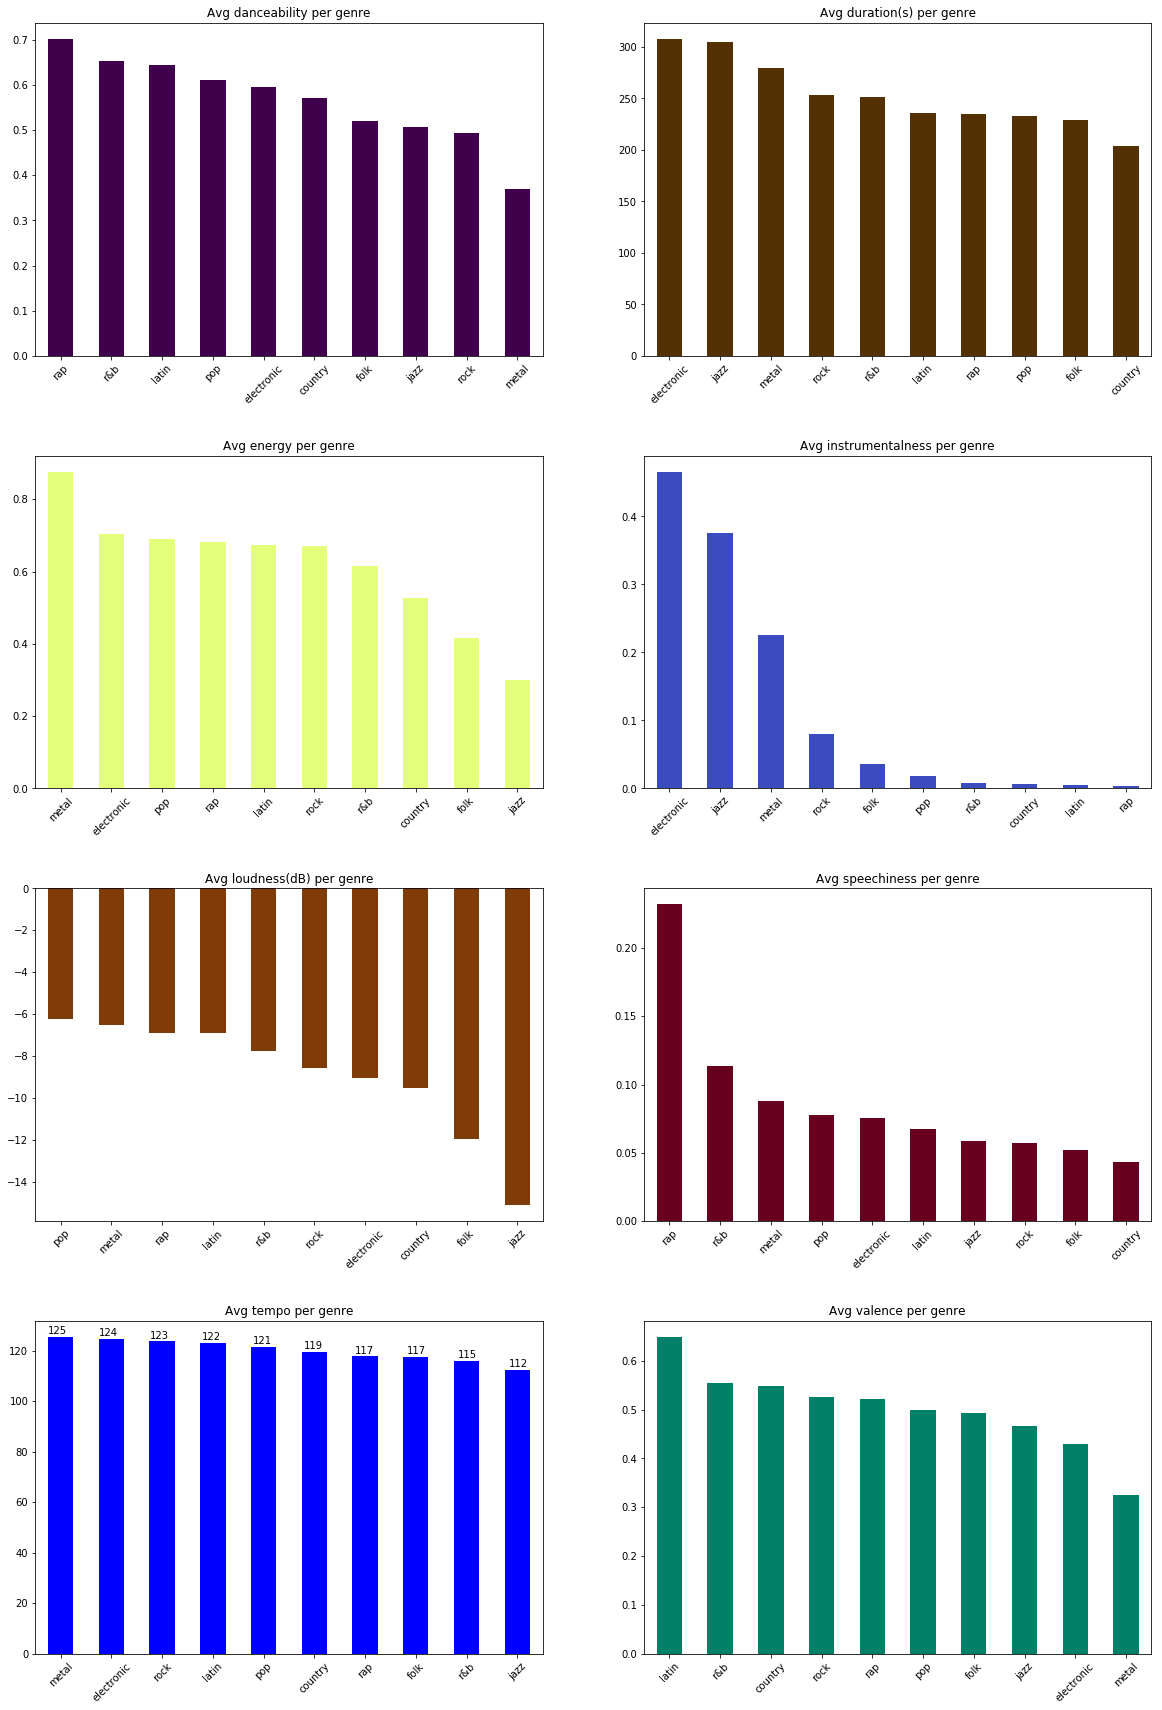

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,30))

danceability.plot(ax=axes[0,0], kind='bar', rot=45, title="Avg danceability per genre", colormap='PRGn')
duration_s.plot(ax=axes[0,1], kind='bar', rot=45, title="Avg duration(s) per genre", colormap='BrBG')
energy.plot(ax=axes[1,0], kind='bar', rot=45, title="Avg energy per genre", colormap='Wistia')
instrumentalness.plot(ax=axes[1,1], kind='bar', rot=45, title="Avg instrumentalness per genre", colormap='coolwarm')
loudness.plot(ax=axes[2,0], kind='bar', rot=45, title="Avg loudness(dB) per genre", colormap='PuOr')
speechiness.plot(ax=axes[2,1], kind='bar', rot=45, title="Avg speechiness per genre", colormap='RdGy')
tempo.plot(ax=axes[3,0], kind='bar', rot=45, title="Avg tempo per genre", colormap='winter')
for p in axes[3,0].patches:
    axes[3,0].annotate(str(int(p.get_height())), (p.get_x() * 1.01, p.get_height() * 1.01))
valence.plot(ax=axes[3,1], kind='bar', rot=45, title="Avg valence per genre", colormap='summer')


    
    
for ax_x in axes:
    for ax_y in ax_x:
        ax_y.xaxis.label.set_visible(False)
plt.subplots_adjust(hspace = 0.3)
plt.show()

### Some basic statistics about keys and time signature per genre

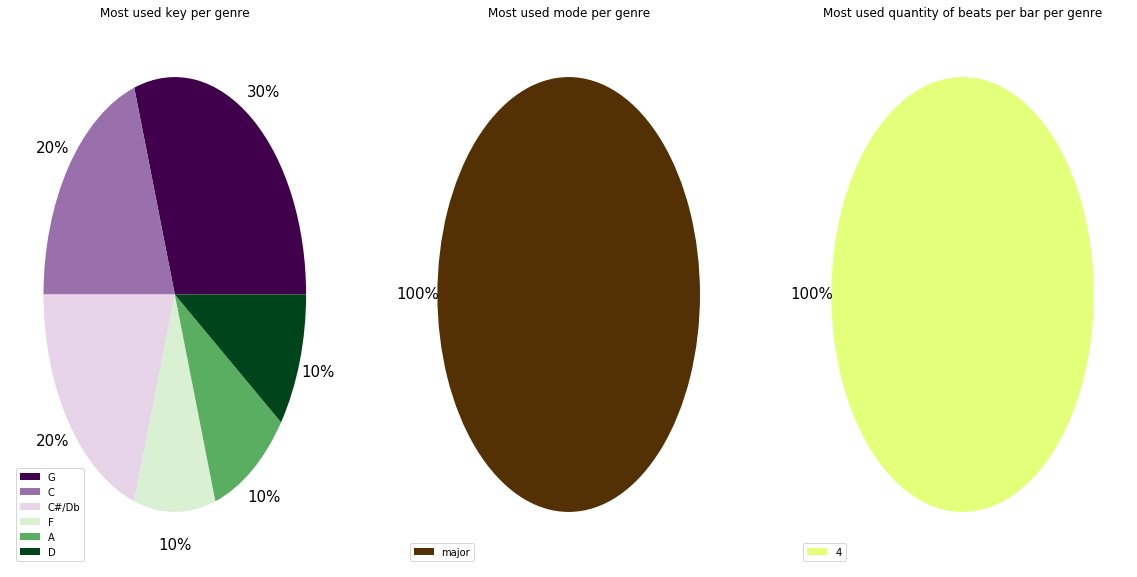

In [9]:
#key, mode, time signature
keys_translation = {
    0: 'C', 
    1: 'C#/Db', 
    2: 'D',
    3: 'D#/Eb',
    4: 'E',
    5: 'F',
    6: 'F#/Gb',
    7: 'G',
    8: 'G#/Ab',
    9: 'A',
    10: 'A#/Bb',
    11: 'B'
}
mode_translation = {
    0: 'minor',
    1: 'major'
}
key_replaced = key.replace(keys_translation)
mode_replaced = mode.replace(mode_translation)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
key_replaced.value_counts().plot(ax=axes[0], kind='pie', title="Most used key per genre", colormap='PRGn', fontsize=15, autopct='%1.0f%%', pctdistance=1.15, labeldistance=1.3, labels = ['','','','','',''])
axes[0].legend(loc=3, labels=key_replaced.value_counts().index)

mode_replaced.value_counts().plot(ax=axes[1], kind='pie', title="Most used mode per genre", colormap='BrBG', fontsize=15, autopct='%1.0f%%', pctdistance=1.15, labeldistance=1.3, labels = [''])
axes[1].legend(loc=3, labels=mode_replaced.value_counts().index)

time_signature.value_counts().plot(ax=axes[2], kind='pie',  title="Most used quantity of beats per bar per genre", colormap='Wistia', fontsize=15, autopct='%1.0f%%', pctdistance=1.15, labeldistance=1.4, labels = [''])
axes[2].legend(loc=3, labels=time_signature.value_counts().index)

for ax in axes:
    ax.yaxis.label.set_visible(False)
plt.show()

### Most used key in each genre

In [10]:
key_df = pd.DataFrame(key.replace(keys_translation))
key_df

,key
genre,
country,G
electronic,G
folk,G
jazz,F
latin,C
metal,D
pop,C
r&b,C#/Db
rap,C#/Db


### Let's try to find correlation between features

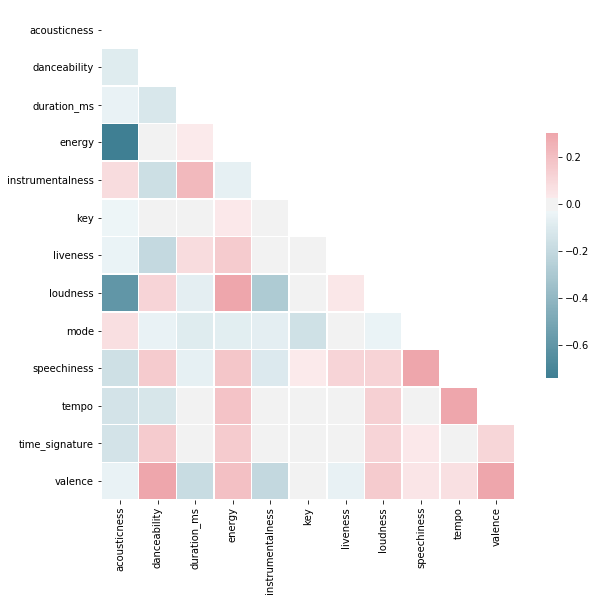

In [17]:
# Compute the correlation matrix
corr = df.corr()
del corr['mode']
del corr['time_signature']

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


### So, apparently, acousticness is heavily correlated with loudness and energy. Also danceability and valence.
### To some degree, instrumentalness and duration are too. Does this mean that instrumental tracks are usually longer?

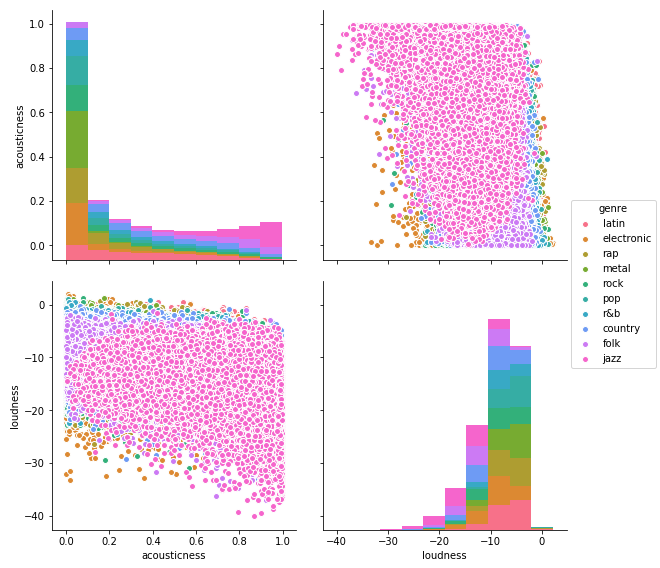

In [24]:
g = sns.pairplot(df, vars=["acousticness", "loudness"], size=4, hue="genre", palette="husl")

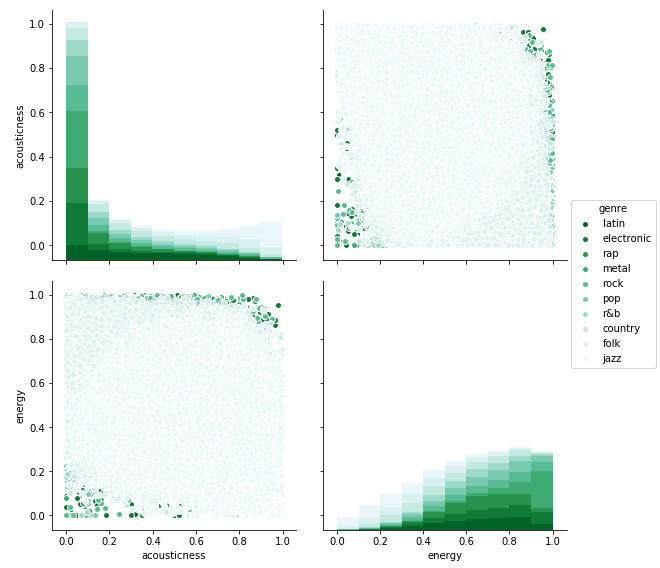

In [29]:
g = sns.pairplot(df, vars=["acousticness", "energy"], size=4, hue="genre", palette="BuGn_r")

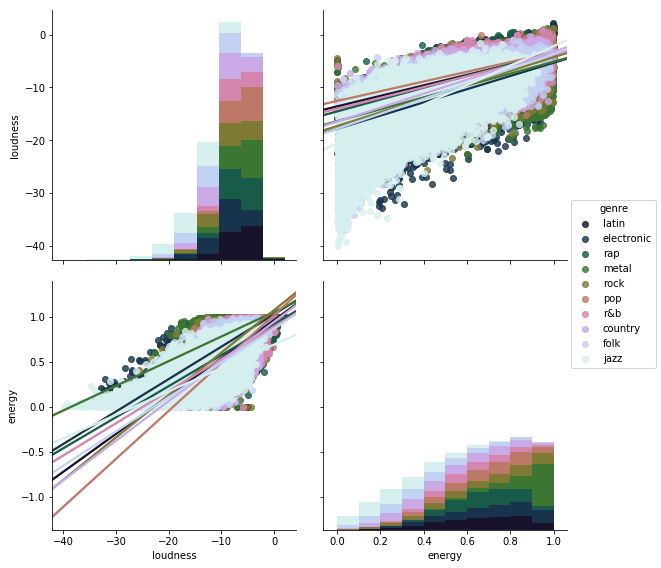

In [30]:
g = sns.pairplot(df, vars=["loudness", "energy"], size=4, hue="genre", palette="cubehelix", kind='reg')

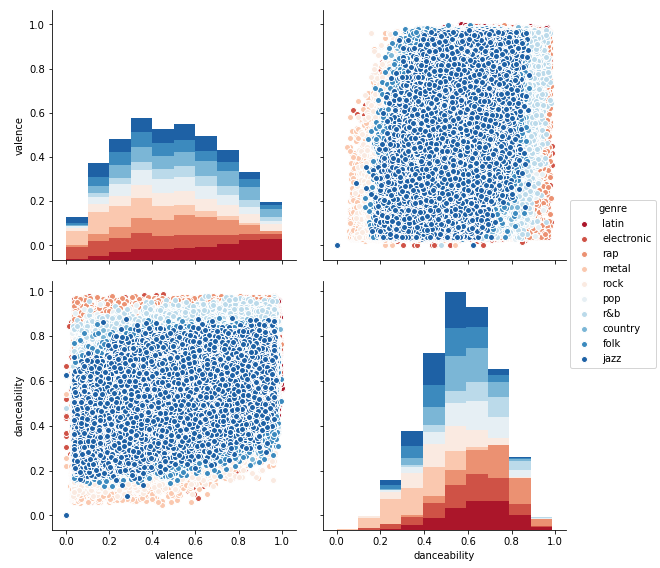

In [31]:
g = sns.pairplot(df, vars=["valence", "danceability"], size=4, hue="genre", palette="RdBu" )

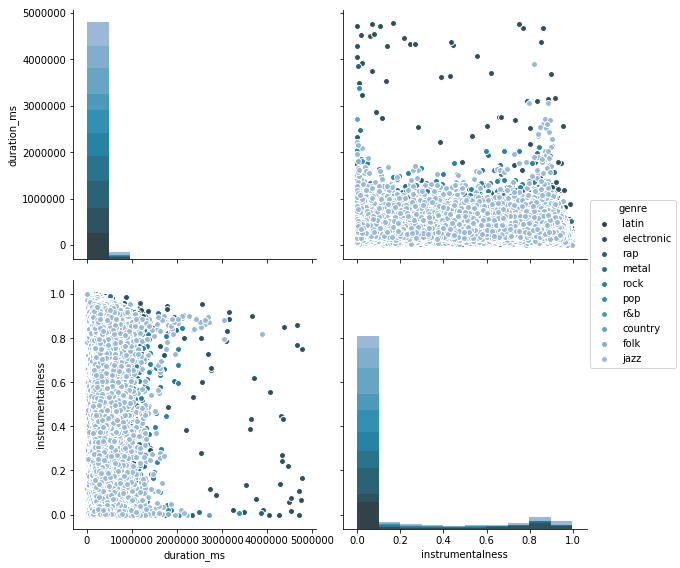

In [32]:
g = sns.pairplot(df, vars=["duration_ms", "instrumentalness"], size=4, hue="genre", palette="PuBuGn_d" )